# 26.8 - t-SNE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('Fashion-MNIST', version=1, cache=True)

Display sample images

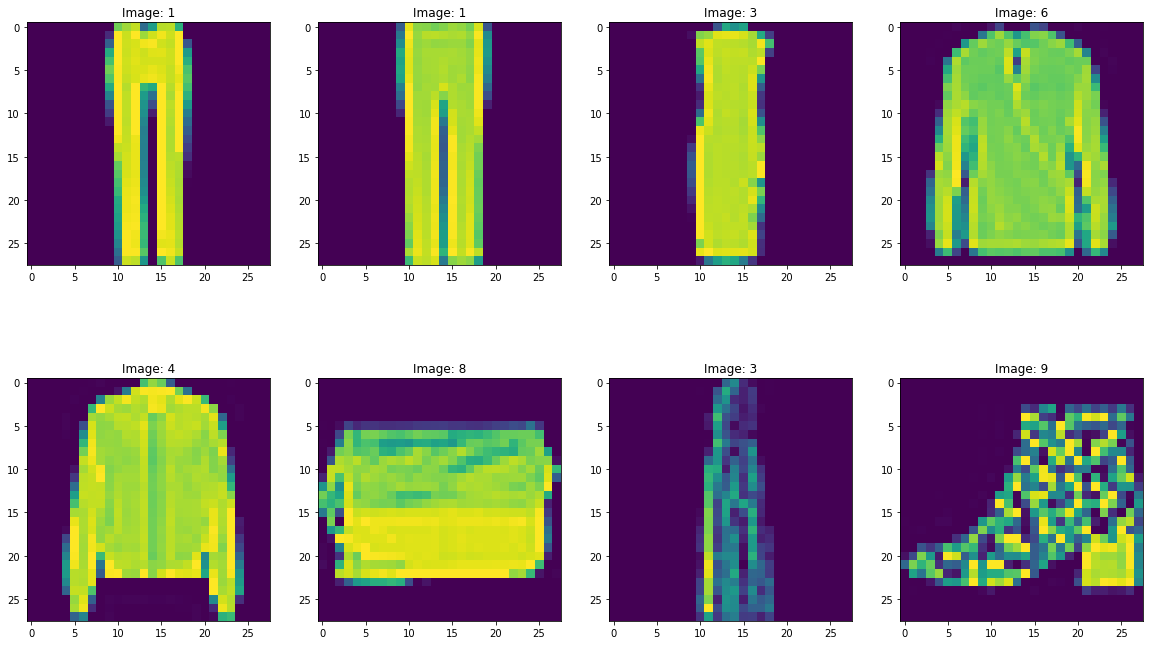

In [3]:
np.random.seed(23)

indices = np.random.choice(70000,10000)
X = mnist.data[indices]
y = mnist.target[indices]

plt.figure(figsize=(20,12))

plt.subplot(2,4,1)
plt.imshow(X[0].reshape(28,28))
plt.title('Image: {}'.format(y[0]))

plt.subplot(2,4,2)
plt.imshow(X[1].reshape(28,28))
plt.title('Image: {}'.format(y[1]))

plt.subplot(2,4,3)
plt.imshow(X[2].reshape(28,28))
plt.title('Image: {}'.format(y[2]))

plt.subplot(2,4,4)
plt.imshow(X[3].reshape(28,28))
plt.title('Image: {}'.format(y[3]))

plt.subplot(2,4,5)
plt.imshow(X[4].reshape(28,28))
plt.title('Image: {}'.format(y[4]))

plt.subplot(2,4,6)
plt.imshow(X[5].reshape(28,28))
plt.title('Image: {}'.format(y[5]))

plt.subplot(2,4,7)
plt.imshow(X[6].reshape(28,28))
plt.title('Image: {}'.format(y[6]))

plt.subplot(2,4,8)
plt.imshow(X[7].reshape(28,28))
plt.title('Image: {}'.format(y[7]))

plt.show()

Plot two-dimensional t-SNE representation

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.916s...
[t-SNE] Computed neighbors for 10000 samples in 125.283s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.443871
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.081238
[t-SNE] KL divergence after 300 iterations: 2.575402


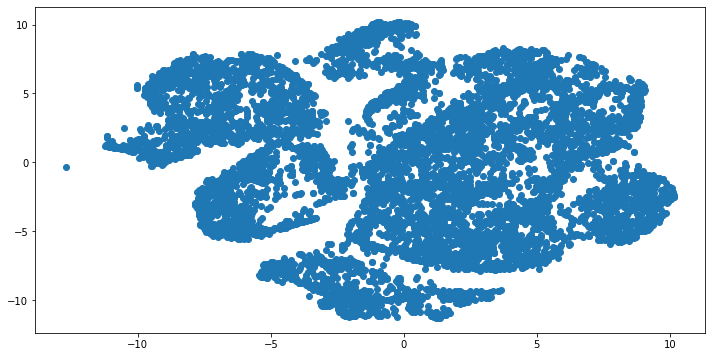

In [4]:
from sklearn.manifold import TSNE

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

tsne_algo = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne = tsne_algo.fit_transform(X_std)

plt.figure(figsize=(12,6))
plt.scatter([x[0] for x in tsne], [x[1] for x in tsne])
plt.show()

Add in colors for classes

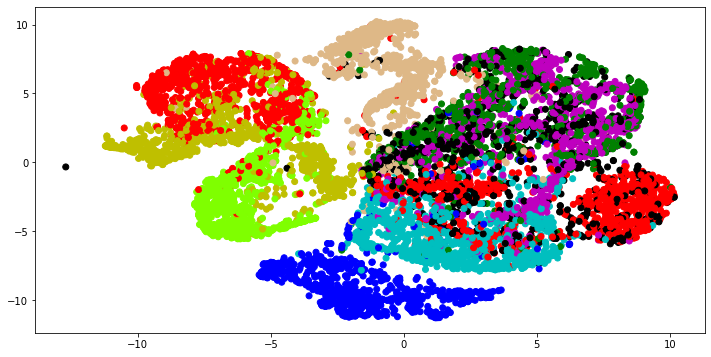

In [5]:
colors = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]

plt.figure(figsize=(12,6))
plt.scatter([x[0] for x in tsne], [x[1] for x in tsne], c=[colors[int(x)] for x in y])
plt.show()

Q: Do you think the t-SNE solution is satisfactory? Can you distinguish between different classes easily?

As is, it is already much better than PCA. There are a couple groups with clear separation, and a couple other clusters that only have 2 or 3 classes.

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.739s...
[t-SNE] Computed neighbors for 10000 samples in 126.230s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 3.584656
[t-SNE] KL divergence after 250 iterations with early exaggeration: 92.802216
[t-SNE] KL divergence after 300 iterations: 3.990469


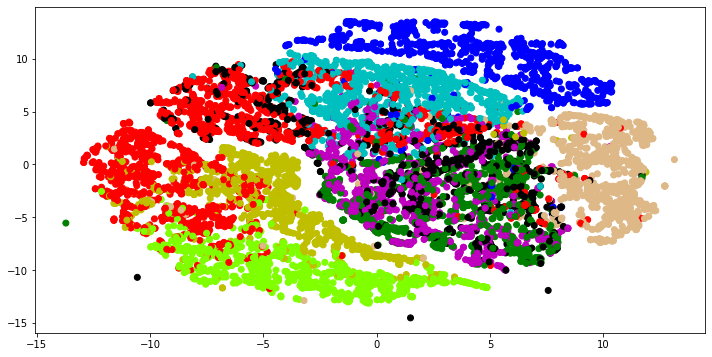

In [6]:
p=5

tsne_algo = TSNE(n_components=2, verbose=1, perplexity=p, n_iter=300)
tsne = tsne_algo.fit_transform(X_std)

plt.figure(figsize=(12,6))
plt.scatter([x[0] for x in tsne], [x[1] for x in tsne], c=[colors[int(x)] for x in y])
plt.show()

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.912s...
[t-SNE] Computed neighbors for 10000 samples in 123.060s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 4.292331
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.406937
[t-SNE] KL divergence after 300 iterations: 3.537291


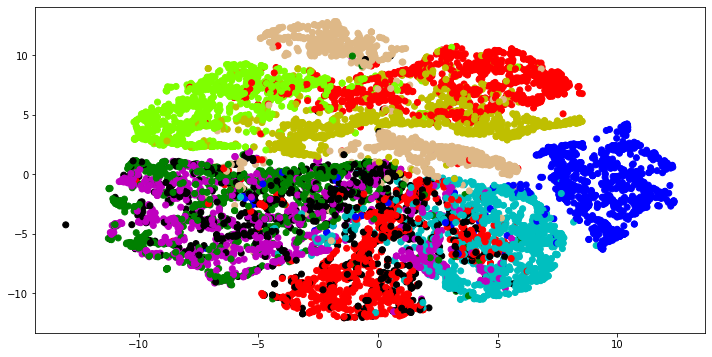

In [7]:
p=10

tsne_algo = TSNE(n_components=2, verbose=1, perplexity=p, n_iter=300)
tsne = tsne_algo.fit_transform(X_std)

plt.figure(figsize=(12,6))
plt.scatter([x[0] for x in tsne], [x[1] for x in tsne], c=[colors[int(x)] for x in y])
plt.show()

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.843s...
[t-SNE] Computed neighbors for 10000 samples in 121.399s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 4.882169
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.080994
[t-SNE] KL divergence after 300 iterations: 3.046822


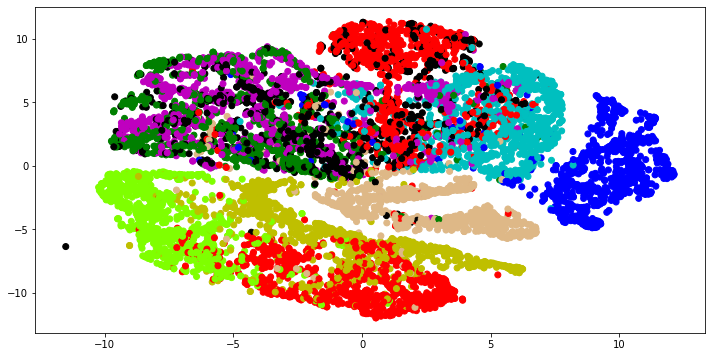

In [8]:
p=20

tsne_algo = TSNE(n_components=2, verbose=1, perplexity=p, n_iter=300)
tsne = tsne_algo.fit_transform(X_std)

plt.figure(figsize=(12,6))
plt.scatter([x[0] for x in tsne], [x[1] for x in tsne], c=[colors[int(x)] for x in y])
plt.show()

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.787s...
[t-SNE] Computed neighbors for 10000 samples in 123.045s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 6.229485
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.325317
[t-SNE] KL divergence after 300 iterations: 1.960217


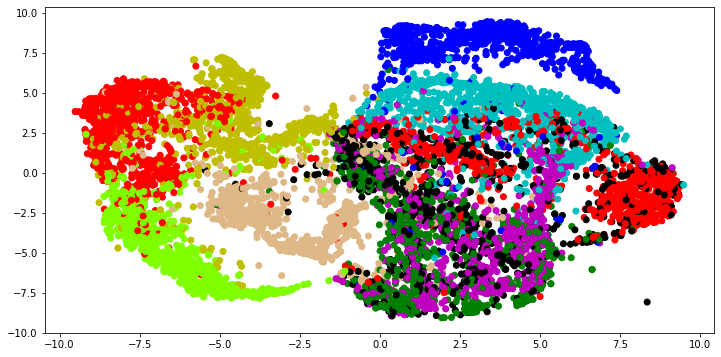

In [9]:
p=100

tsne_algo = TSNE(n_components=2, verbose=1, perplexity=p, n_iter=300)
tsne = tsne_algo.fit_transform(X_std)

plt.figure(figsize=(12,6))
plt.scatter([x[0] for x in tsne], [x[1] for x in tsne], c=[colors[int(x)] for x in y])
plt.show()

[t-SNE] Computing 1501 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.829s...
[t-SNE] Computed neighbors for 10000 samples in 127.339s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 7.758133
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.990383
[t-SNE] KL divergence after 300 iterations: 1.017360


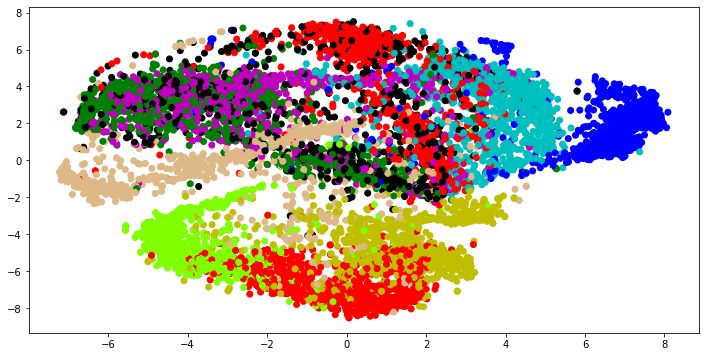

In [10]:
p=500

tsne_algo = TSNE(n_components=2, verbose=1, perplexity=p, n_iter=300)
tsne = tsne_algo.fit_transform(X_std)

plt.figure(figsize=(12,6))
plt.scatter([x[0] for x in tsne], [x[1] for x in tsne], c=[colors[int(x)] for x in y])
plt.show()

[t-SNE] Computing 6001 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.006s...
[t-SNE] Computed neighbors for 10000 samples in 15.168s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 9.753747
[t-SNE] KL divergence after 50 iterations with early exaggeration: 46.207954
[t-SNE] KL divergence after 300 iterations: 0.366128


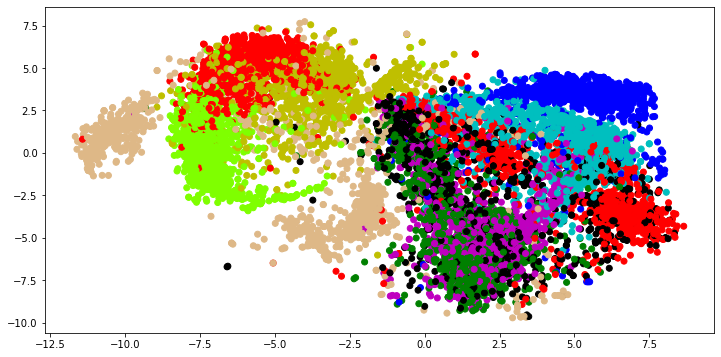

In [11]:
p=2000

tsne_algo = TSNE(n_components=2, verbose=1, perplexity=p, n_iter=300)
tsne = tsne_algo.fit_transform(X_std)

plt.figure(figsize=(12,6))
plt.scatter([x[0] for x in tsne], [x[1] for x in tsne], c=[colors[int(x)] for x in y])
plt.show()

The original perplexity (40) seems to be approximately the sweet spot for this problem. Just for curiosity's sake, I tried to test t-SNE with this setting for perplexity, but increasing the number of iterations from 300 to 3000.

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.734s...
[t-SNE] Computed neighbors for 10000 samples in 127.126s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.443871
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.960312
[t-SNE] KL divergence after 3000 iterations: 1.452718


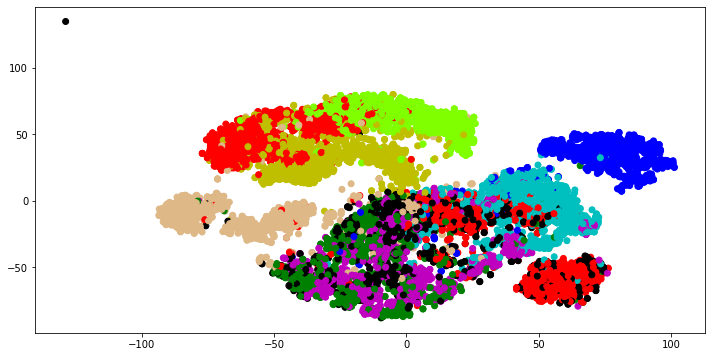

In [12]:
p=40

tsne_algo = TSNE(n_components=2, verbose=1, perplexity=p, n_iter=3000)
tsne = tsne_algo.fit_transform(X_std)

plt.figure(figsize=(12,6))
plt.scatter([x[0] for x in tsne], [x[1] for x in tsne], c=[colors[int(x)] for x in y])
plt.show()

A lot of classes are blended together, but we are definitely starting to see some more well-defined clusters!